In [ ]:
"""NEURAL NETWORKS"""

# neural networks:
# > goal was/is to mimic the human brain.
# > input layer has features.
# > hidden layer(s) perform computations.
# > output layer outputs one number, the final activation/prediction.

# human brain neuron:
# > cell body, with nucleus in middle.
# > cell body has inputs via dendrites.
# > cell body sends outputs via axon.
# > output becomes input to another neuron.

# mathematic model neuron:
# > inputs are just numbers.
# > outputs one number.
# > this output is input elsewhere.
# > so the 'cell body' will perform some sort of computation.

# case study - selling tshirts:
# > could input price & shipping cost into neuron and output affordability.
# > could input price & material into neuron and output perceived quality.
# > could input marketing into neuron and output consumer awareness.
# > then all of these neurons are inputs into another, that outputs chance of being best seller.
# > four input numbers are one layer (input layer).
# > first three neurons are one layer (a hidden layer).
# > final solo neuron is a layer also (output layer).
# > affordability, perceived quality and consumer awareness are activations.
# > Each neuron in a layer has access to all features/values from previous layer.
# > So first layer will have access to all features in input layer.
# > The neuron may learn to ignore features of no use to it.
# > input layer = feature vector = \vec{x} = (price, shipping, marketing, material).
# > first layer = also a vector = \vec{a} = (affordability, perceived quality, awareness).
# > each neuron outputs the output of a logistic regression model as its activation, a.
# > activation = a_i^{[l]} = sigmoid(z) = g(z) = g(w_i^{[l]}·a^{[l-1]} + b_i^{[l]}).
# > output of layer 2 = [2] = a^{[2]} = input to layer 3.
# > can reduce final output to a binary prediction with is a[final] >= 0.5 etc.

# > layer_1 = Dense(units=25, activation='sigmoid')
# > a1 = layer_1(x)
# > layer_2 = Dense(units=15, activation='sigmoid')
# > a2 = layer_1(a1)
# > layer_3 = Dense(units=1, activation='sigmoid')
# > a3 = layer_1(a2)
# > use a3 for binary prediction !

# case study - face recognition:
# > each pixel in an image is represented by a number.
# > these numbers form the feature vector = input layer.
# > an early layer may be looking for edges and lines etc.
# > a middle layer may be searching for eyes and noses and ears etc.
# > a later layer may be searching for larger face areas etc.
# > a 3 unit layer will have W1, W2, W3, and b1, b2, b3.
# > each unit will perform dot(W_i^[l], a^[l-1]) etc.

# case study - digit recognition:
# > 8x8 image has 64 pixels, each with own numbers.
# > so feature vector will have 64 numbers.
# > layer1 has 25 units, layer2 has 15 units, layer3 has 1 unit.
# > output as probability that digit is a 1, classify into y or n (a_1^{[3]} >= 0.5 etc).
# > forward propagation: input layer -> hidden layers -> output layer -> prediction.

# build a neural network with tensor flow:
# > layer_1 = tf.Dense(units=3, activation="sigmoid")
# > layer_2 = tf.Dense(units=1, activation="sigmoid")
# > model = Sequential([layer_1, layer_2])
# > ...
# > X = np.array([[200.0, 17.0], [120.0, 157.0], [425.0, 20.0], [212.0, 18.0]])
# > y = np.array([1, 0, 0, 1])
# > ...
# > model.compile()
# > model.fit()
# > ...
# > model.predict()

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential

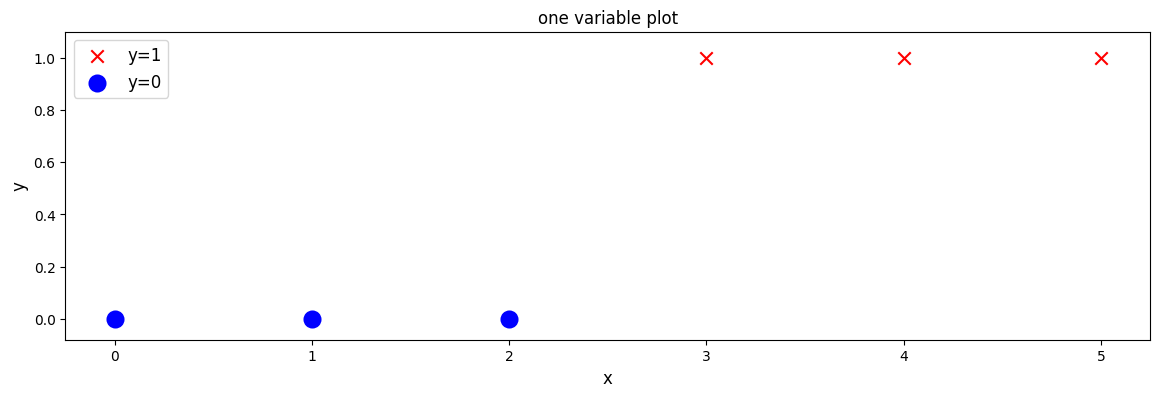

In [61]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(14,4))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, c='blue', label="y=0", lw=3)
ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [62]:
# logistic regression neuuron:
model = Sequential([tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')])

logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print("Logistic regression model:")
print(f"w: {w}")
print(f"b: {w}")

Logistic regression model:
w: [[-0.71483743]]
b: [[-0.71483743]]


/Users/tstalley/PycharmProjects/MachineLearningSpecialization/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# set weight and bias:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])

In [64]:
# model prediction will output probabilities:
a = [model.predict(ele.reshape(1,1)) for ele in X_train]
print(f"\nprobabilites:\n{[p[0][0] for p in a]}")
print(f"\npredictions:\n{[0 if p[0][0]<= 0.5 else 1 for p in a]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

probabilites:
[0.010986943, 0.075858176, 0.37754068, 0.8175745, 0.97068775, 0.99592984]

predictions:
[0, 0, 0, 1, 1, 1]


In [3]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def dense(A_in, W, B):
    # neural network layer using vectorisation:
    Z = np.matmul(A_in, W) + B
    A_out = sigmoid(Z)
    return A_out